<a href="https://colab.research.google.com/github/ensarg/OOPython/blob/main/memory_management/memory_management_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Python manages memory automatically through three main mechanisms:

Reference counting – every object keeps track of how many references point to it.

Garbage collection – unused (unreferenced) objects are automatically removed.

Private heap + memory pools – all Python objects live in a managed heap, not directly on the stack.

Reference Counting — The Foundation

Every Python object has a reference count (number of variables or data structures pointing to it).
When this count reaches zero, the memory is automatically freed.

In [1]:
import sys

a = [1, 2, 3]
print("Initial refcount:", sys.getrefcount(a))  # 2 (a + argument in getrefcount)

b = a  # another reference
print("After assigning b:", sys.getrefcount(a))  # 3 (a, b, and getrefcount)

del b
print("After deleting b:", sys.getrefcount(a))  # back to 2


Initial refcount: 2
After assigning b: 3
After deleting b: 2


Every time a new name (variable) points to the same object, its reference count increases.

When you delete a reference (e.g., del b), the count decreases.

When the count hits zero, the memory is released automatically.

Garbage Collection — Handling Circular References

Reference counting alone can’t clean up circular references (e.g., two objects referring to each other).
Python’s garbage collector (gc module) finds and removes such cycles.

In [2]:
import gc

class Node:
    def __init__(self):
        self.ref = None

# Create two nodes referencing each other
a = Node()
b = Node()
a.ref = b
b.ref = a

# Delete external references
del a
del b

# Force garbage collection
collected = gc.collect()
print(f"Garbage collector collected {collected} unreachable objects.")


Garbage collector collected 16 unreachable objects.


Even though both objects refer to each other, they’re unreachable from your code.

The garbage collector detects and removes them.

Memory Reuse (Interning and Object Reuse)

Python optimizes memory by reusing small immutable objects, especially integers and strings.

In [3]:
a = 10
b = 10
print(a is b)  # True - same memory address reused

x = 3000
y = 3000
print(x is y)  # False - large integers are not reused

s1 = "hello"
s2 = "hello"
print(s1 is s2)  # True - string interning


True
False
True


Small integers (usually −5 to 256) are cached for efficiency.

Identical string literals are interned — only one copy stored.

Memory Management with Mutable vs Immutable Types
Example: Mutability affects memory behavior

In [5]:
# Immutable (integers)
x = 5
print(id(x))
x += 1
print(id(x))  # different object (new memory allocated)

# Mutable (lists)
lst = [1, 2]
print(id(lst))
lst.append(3)
print(lst)  # print list
print(id(lst))  # same object (modified in place)


11654504
11654536
137686722312576
[1, 2, 3]
137686722312576


Immutable objects (ints, strings, tuples) cannot change their content — any modification creates a new object.

Mutable objects (lists, dicts, sets) can change in place, preserving the same memory address.

Memory Leaks — and How Python Prevents Them

Python prevents most memory leaks through garbage collection.
However, you can still create leaks if you store references indefinitely (e.g., in global lists or closures).

In [6]:
leak = []

def create_leak():
    a = [1] * 100000  # large list
    leak.append(a)    # stored forever in global list

for _ in range(100):
    create_leak()

print("Leaked objects:", len(leak))  # Never freed!


Leaked objects: 100


The list leak holds references to large lists that never go out of scope.

Since reference count never reaches zero, memory is never reclaimed.

Manual Garbage Control (Advanced)

You can control garbage collection manually:

In [7]:
import gc

gc.disable()
print("Garbage collection disabled.")

# your program logic
gc.collect()  # manually trigger
print("Garbage collection manually triggered.")


Garbage collection disabled.
Garbage collection manually triggered.


| Concept            | Mechanism                               | Example                     |
| ------------------ | --------------------------------------- | --------------------------- |
| Reference Counting | Each object tracks number of references | `sys.getrefcount()`         |
| Garbage Collection | Removes circular references             | `gc.collect()`              |
| Object Reuse       | Reuses small immutable objects          | `a = 10; b = 10`            |
| Mutability         | Mutable vs. immutable memory behavior   | `list` vs `int`             |
| Memory Leak        | Retaining references too long           | Global list holding objects |


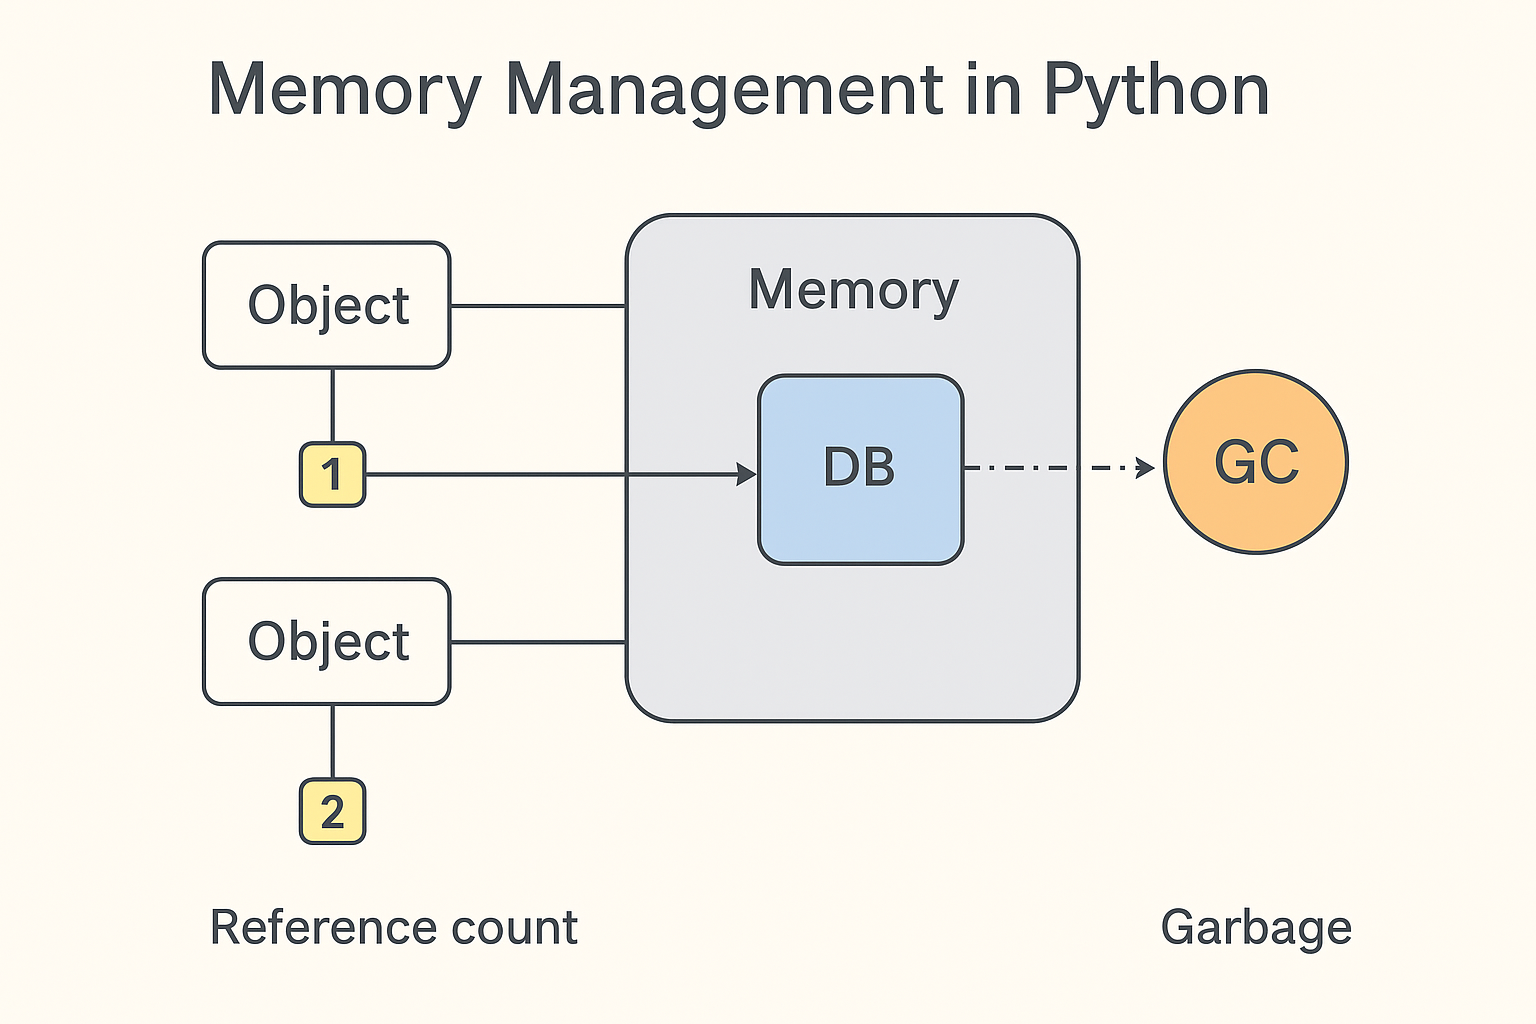